# Pre-processing and analysis for one-source with distance 25

## Load or create R scripts

In [1]:
get.data <- dget("get_data.r") #script to read data files
get.pars <- dget("get_pars.r") #script to extract relevant parameters from raw data
get.mv.bound <- dget("get_mvbound.r") #script to look at movement of boundary across learning
plot.cirib <- dget("plot_cirib.r")  #script to plot confidence intervals as ribbon plot

In [23]:
zscore <- function(v){(v - mean(v, na.rm=T))/sqrt(var(v, na.rm=T))} #function to compute Z score

## Load data

In [24]:
fnames <- list.files(pattern = "*.csv") #create a vector of data file names, assuming all csv files are data
nfiles <- length(fnames) #number of data files
alldat <- list(get.data(fnames[1])) #initialize list containing all data with first subject
for(i1 in c(2:nfiles)) alldat[[i1]] <- get.data(fnames[i1]) #populate list with rest of data

allpars <- get.pars(alldat) #extract parameters from grid test 1 and 2 from all data

[1] "Processing sj: 1"


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 2"
[1] "Processing sj: 3"
[1] "Processing sj: 4"
[1] "Processing sj: 5"
[1] "Processing sj: 6"
[1] "Processing sj: 7"


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 8"
[1] "Processing sj: 9"
[1] "Processing sj: 10"
[1] "Processing sj: 11"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 12"
[1] "Processing sj: 13"
[1] "Processing sj: 14"


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 15"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 16"
[1] "Processing sj: 17"
[1] "Processing sj: 18"


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 19"


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 20"
[1] "Processing sj: 21"


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 22"
[1] "Processing sj: 23"
[1] "Processing sj: 24"
[1] "Processing sj: 25"


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 26"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 27"
[1] "Processing sj: 28"
[1] "Processing sj: 29"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 30"
[1] "Processing sj: 31"
[1] "Processing sj: 32"
[1] "Processing sj: 33"
[1] "Processing sj: 34"


NOTE that get pars will produce warnings whenever the subject data has a perfectly strict boundary--these can be safely ignored.

In [25]:
head(allpars)

PID,cond,axlab,closebound,cbside,sno,FaceLeft,t1int,t1slope,t1bound,t2int,t2slope,t2bound,bshift,alshift,Zalshift,t1dist
one25_C_125_1,one25,SP-C,125,left,1,1,9.928810,-0.06848162,144.9850,19.713757,-0.12321083,160.0002,15.015170,-15.015170,0.1714986,-19.98503
one25_C_125_10,one25,Sp-C,125,left,10,2,17.249492,-0.12321083,139.9998,559.102995,-4.14144147,135.0020,-4.997775,4.997775,0.1714986,-14.99980
one25_C_125_17,one25,SP-C,125,left,17,1,15.283011,-0.10188674,150.0000,5.887319,-0.04550183,129.3864,-20.613579,20.613579,0.1714986,-25.00000
one25_C_125_19,one25,SP-C,125,left,19,1,10.127234,-0.05453984,185.6851,18.996199,-0.13100831,145.0000,-40.685103,40.685103,0.1714986,-60.68506
one25_C_125_2,one25,SP-C,125,left,2,2,9.429957,-0.05890858,160.0778,7.690431,-0.06702631,114.7375,-45.340318,45.340318,0.1714986,-35.07782
one25_C_125_20,one25,SP-C,125,left,20,2,10.497073,-0.06358716,165.0816,8.194707,-0.05653345,144.9533,-20.128374,20.128374,0.1714986,-40.08164


In [26]:
dim(allpars)

[1] 34 17

### KEY

**PID**: Unique tag for each participant 
**cond**: Experiment condition 
**axlab**: What shape (spiky/smooth) got the "Cooked" label? For counterbalancing, not interesting  
**closebound**:    What was the location of the closest source boundary?  
**cbside**: Factor indicating what side of the range midpoint has the close boundary
**sno**:       Subject number in condition 
**txint, slope, bound**:  Intercept, slope, and estimated boundary from logistic regression on test 1 and test 2 data. NOTE that only the boundary estimate is used in analysis.  
**bshift**:    Boundary shift direction and magnitude measured as test 2 boundary - test 1 boundary  
**alshift**:  Placeholder for aligned boundary shift (see below), currently just a copy of bshift  
**Zalshift**: Zscored midshift, recalculated below

## Check data for outliers

Set Zscore threshold for outlier rejection

In [47]:
zthresh <- 2.5

First check t1bound and t2bound to see if there are any impossible values.

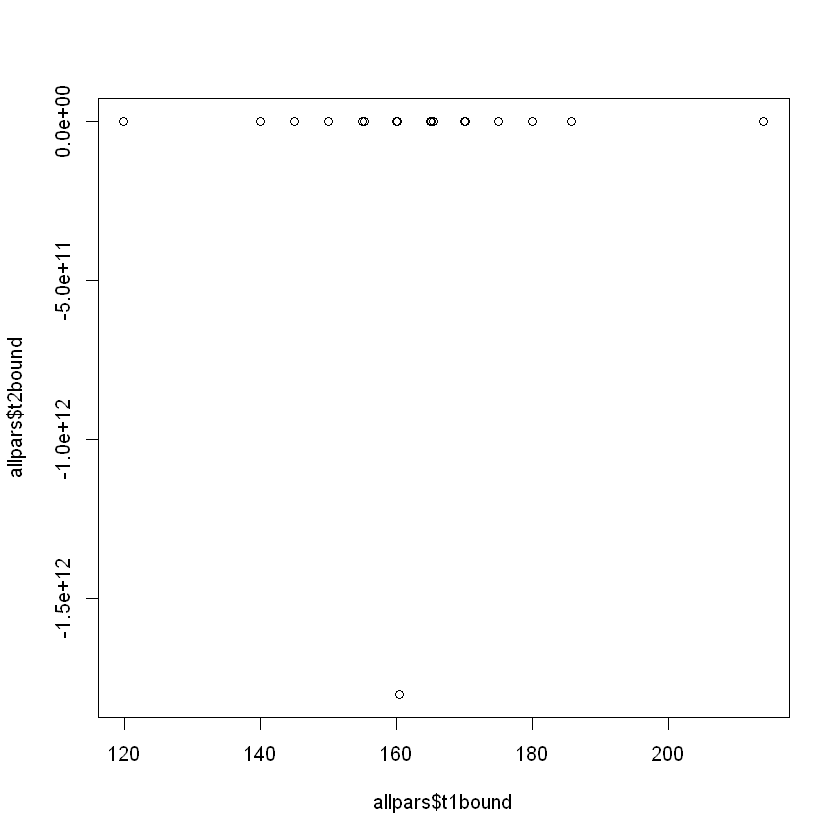

In [48]:
plot(allpars$t1bound, allpars$t2bound)

There is an impossible t2bound so let's remove it.

In [49]:
dim(allpars)
sjex <- as.character(allpars$PID[allpars$t2bound < 0]) #Add impossible value to exclude list
sjex <- unique(sjex) #remove any accidental repeats
noo <- allpars[is.na(match(allpars$PID, sjex)),] #Copy remaining subjects to noo object
dim(noo)

[1] 34 17

[1] 33 17

Write "no impossible" (nimp) file for later agglomeration in mega-data

In [50]:
write.csv(noo, "summary/one25_grids_nimp.csv", row.names = F, quote=F)

Check to make sure "aligned" shift computation worked (should be an X pattern)

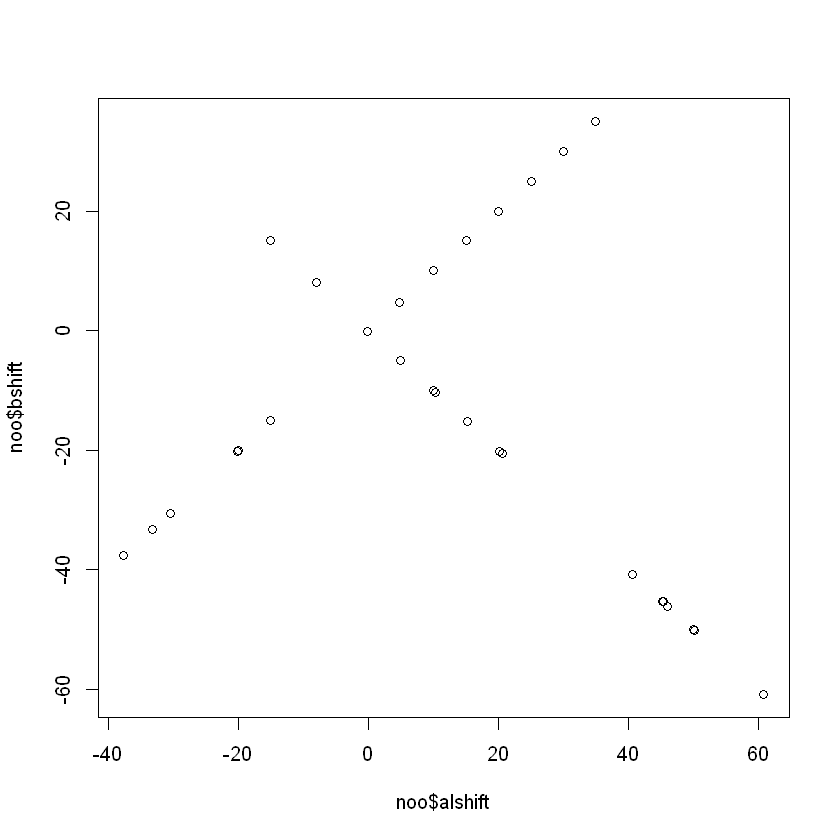

In [51]:
plot(noo$alshift, noo$bshift)

Check initial boundary for outliers

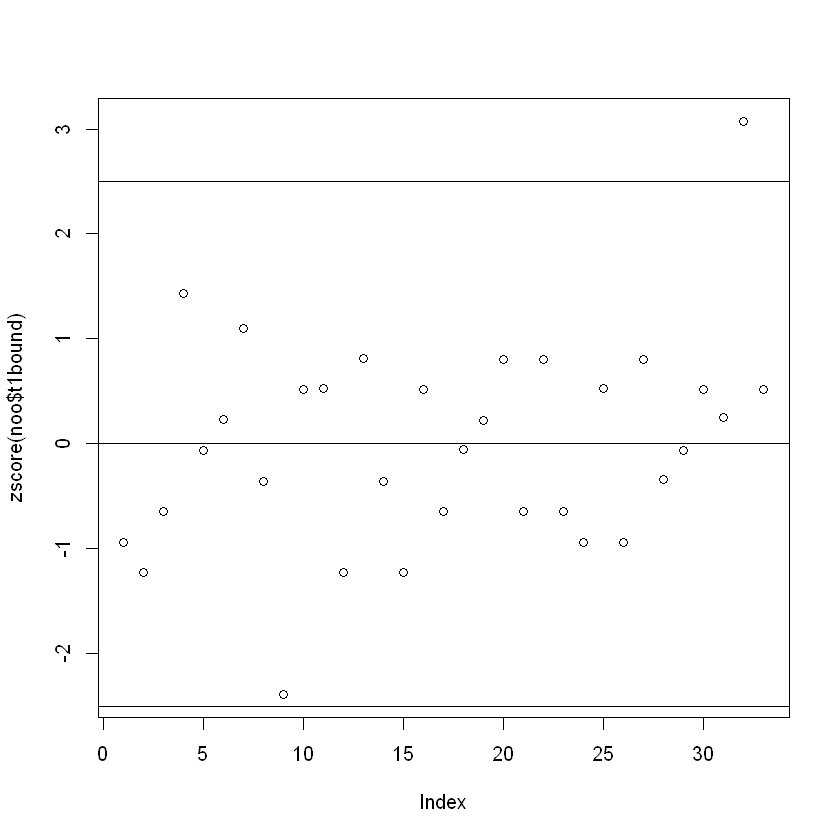

In [52]:
plot(zscore(noo$t1bound))
abline(h=c(-zthresh,0,zthresh))

Add any outliers to the exclusion list and recompute no-outlier data structure

In [53]:
sjex <- c(sjex, as.character(allpars$PID[abs(zscore(allpars$t1bound)) > zthresh]))
sjex <- unique(sjex) #remove accidental repeats
noo <- noo[is.na(match(noo$PID, sjex)),]
dim(noo)

[1] 32 17

Now compute Zscore for aligned shift for all subjects and look for outliers

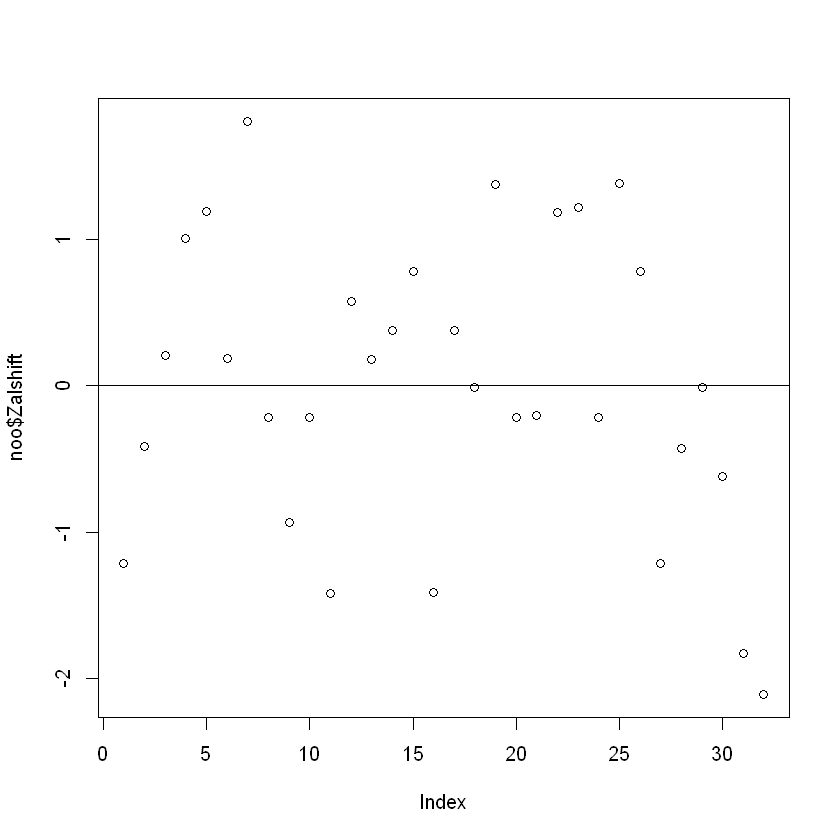

In [54]:
noo$Zalshift <- zscore(noo$alshift)             #Compute Z scores for this aligned shift
plot(noo$Zalshift); abline(h = c(-zthresh,0,zthresh))       #plot Zscores

Again add any outliers to exclusion list and remove from noo

In [55]:
sjex <- c(sjex, as.character(noo$PID[abs(noo$Zalshift) > zthresh]))
sjex <- unique(sjex) #remove accidental repeats
noo <- noo[is.na(match(noo$PID, sjex)),]
dim(noo)

[1] 32 17

## Data analysis

Does the initial (t1) boundary differ between the two groups? It shouldn't since they have the exact same experience to this point.

In [56]:
t.test(t1bound ~ closebound, data = noo)


	Welch Two Sample t-test

data:  t1bound by closebound
t = -0.47452, df = 29.275, p-value = 0.6386
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.940156   8.064739
sample estimates:
mean in group 125 mean in group 175 
         158.3011          160.7388 


Reassuringly, it doesn't. So what is the location of the initial boundary on average?

In [57]:
t.test(noo$t1bound) #NB t.test of a single vector is a good way to compute mean and CIs 


	One Sample t-test

data:  noo$t1bound
t = 61.859, df = 31, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 154.1869 164.7007
sample estimates:
mean of x 
 159.4438 


The mean boundary is shifted a bit positive relative to the midpoint between labeled examples

Next, looking across all subjects, does the aligned boundary shift differ reliably from zero? Also, what are the confidence limits on the mean shift?

In [58]:
t.test(noo$alshift)


	One Sample t-test

data:  noo$alshift
t = 3.4745, df = 31, p-value = 0.001534
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  6.364148 24.454684
sample estimates:
mean of x 
 15.40942 


The boundary shifts reliably toward the close source. The mean amount of shift is 18, and the confidence interval spans 9-27.

Next, where does the test 2 boundary lie for each group, and does this differ depending on where the source was?

In [59]:
t.test(t2bound ~ closebound, data = noo)


	Welch Two Sample t-test

data:  t2bound by closebound
t = -5.2961, df = 28.768, p-value = 1.14e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -44.42278 -19.66499
sample estimates:
mean in group 125 mean in group 175 
         133.7968          165.8407 


When the source was at 125, the boundary ends up at 134; when the source is at 175, the boundary ends up at 166.

Is the boundary moving all the way to the source?

In [60]:
t.test(noo$t2bound[noo$closebound==125]) #compute confidence intervals for source at 125 subgroup


	One Sample t-test

data:  noo$t2bound[noo$closebound == 125]
t = 33.72, df = 16, p-value = 2.717e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 125.3852 142.2083
sample estimates:
mean of x 
 133.7968 


In [61]:
t.test(noo$t2bound[noo$closebound==175]) #compute confidence intervals for source at 175 subgroup


	One Sample t-test

data:  noo$t2bound[noo$closebound == 175]
t = 36.307, df = 14, p-value = 2.978e-15
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 156.0439 175.6374
sample estimates:
mean of x 
 165.8407 


In both cases boundaries move toward the source. When the initial boundary is closer to the source (source at 175), the final boundary ends up at the source. When it is farther away (source at 125), the final boundary ends up a little short of the source.

Another way of looking at the movement is to compute, for each subject, how far the source was from the learner's initial boundary, and see if this predicts the amount of shift:

In [62]:
#Predict the boundary shift from the distance between initial bound and source
m <- lm(bshift ~ t1dist, data = noo)     #fit linear model predicting shift from distance
summary(m)                  #look at model parameters


Call:
lm(formula = bshift ~ t1dist, data = noo)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.958 -14.622   6.458  11.429  32.372 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.3765     3.4189  -0.695    0.492    
t1dist        0.7496     0.1147   6.537 3.14e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.97 on 30 degrees of freedom
Multiple R-squared:  0.5875,	Adjusted R-squared:  0.5738 
F-statistic: 42.73 on 1 and 30 DF,  p-value: 3.143e-07


Distance predicts shift significantly. The intercept is not reliably different from zero, so that, with zero distance, boundary does not shift. The slope of 0.776 suggests that the boundary shifts 78 percent of the way toward the close source. Let's visualize:

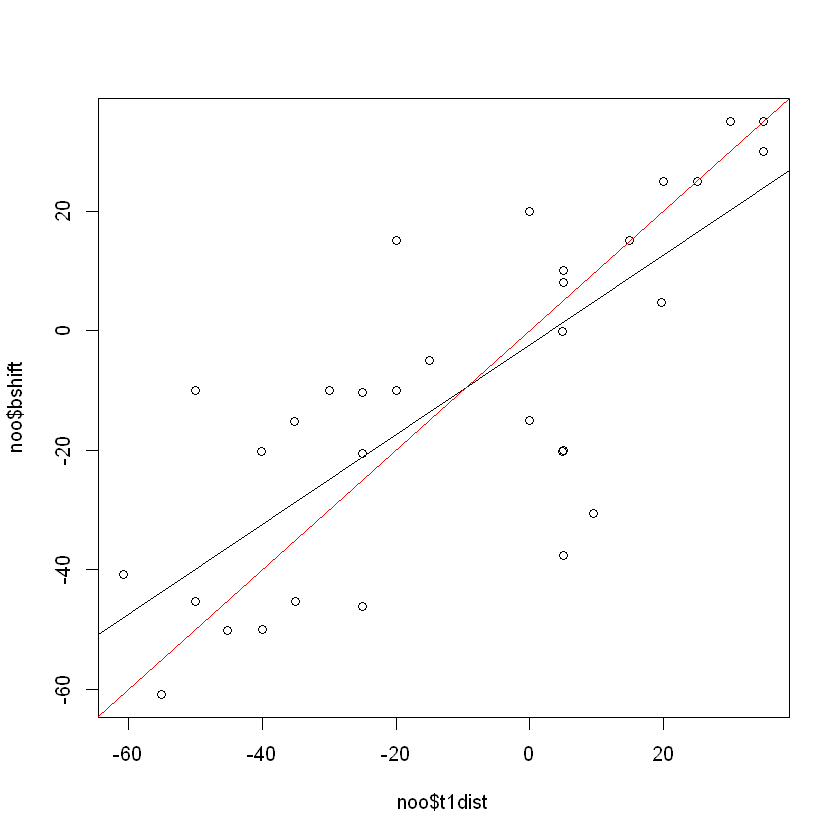

In [63]:
plot(noo$t1dist, noo$bshift) #plot distance of source against boundary shift
abline(lm(bshift~t1dist, data = noo)$coefficients) #add least squares line
abline(0,1, col = 2)   #Add line with slope 1 and intercept 0 

The black line shows the least-squares linear fit; the red line shows the expected slope if learner moved all the way toward the source. True slope is quite a bit shallower. If we compute confidence limits on slope we get:

In [64]:
confint(m, 't1dist', level = 0.95)

,2.5 %,97.5 %
t1dist,0.5153834,0.9837577


So the confidence limit extends v close to 1

### Export parameter data

In [65]:
write.csv(noo, paste("summary/onesrc25_noo_z", zthresh*10, ".csv", sep=""), row.names=F, quote=F)

## Further analyses

### Movement of boundary over the course of learning

In [214]:
nsj <- length(alldat)    #Number of subjects is length of alldat object
mvbnd <- matrix(0, nsj, 301)  #Initialize matrix of 0s to hold boundary-movement data, with 301 windows
for(i1 in c(1:nsj)) mvbnd[i1,] <- get.mv.bound(alldat, sj=i1) #Compute move data for each sj and store in matrix rows


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 o

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fi

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fi

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

Again, ignore warnings here

In [68]:
tmp <- cbind(allpars[,1:6], mvbnd) #Add subject and condition data columns
mvb.noo <- tmp[is.na(match(tmp$PID, sjex)),] #Remove excluded subjects

In [215]:
head(mvb.noo)

PID,cond,noingrp,bounds,sno,FaceLeft,1,2,3,4,...,292,293,294,295,296,297,298,299,300,301
SP-C_1_1,SP-C,1,125,1,1,144.8148,143.7100,139.7098,136.5564,...,125.1072,125.1072,125.1072,107.1968,111.9175,114.8856,114.8968,114.8966,115.3111,120.6980
Sp-C_10_2,Sp-C,1,125,10,2,144.8069,144.8623,145.6435,150.3540,...,127.0173,127.0171,126.9998,126.9998,126.9944,126.9932,126.9919,126.9925,126.9914,126.9789
SP-C_17_1,SP-C,1,125,17,1,149.9837,154.2690,154.2690,150.5538,...,149.1056,150.9455,153.1900,152.8891,151.7095,148.2000,150.9100,153.9047,156.0008,158.0183
SP-C_19_1,SP-C,1,125,19,1,185.6902,185.6544,188.1915,186.6680,...,112.0128,112.0128,112.0201,113.7195,113.9071,121.9948,121.9948,129.1019,131.3533,131.3457
SP-C_2_2,SP-C,1,125,2,2,160.0782,159.6446,160.3802,158.4030,...,132.0191,132.0186,132.0186,133.0032,138.1294,134.8106,129.6750,128.5580,130.5008,131.5195
SP-C_20_2,SP-C,1,125,20,2,165.0797,165.3088,164.3107,161.9417,...,141.2177,141.0272,143.8955,144.0126,144.3057,144.3249,144.3251,142.0364,129.6777,129.6307


In [216]:
tmp <- mvb.noo[,7:307] #Copy movement data into temporary object
tmp[abs(tmp) > 250] <- NA  #Remove boundary estimates that are extreme (outside 50-250 range)
tmp[tmp < 50] <- NA
mvb.noo[,7:307] <- tmp   #Put remaining data back in


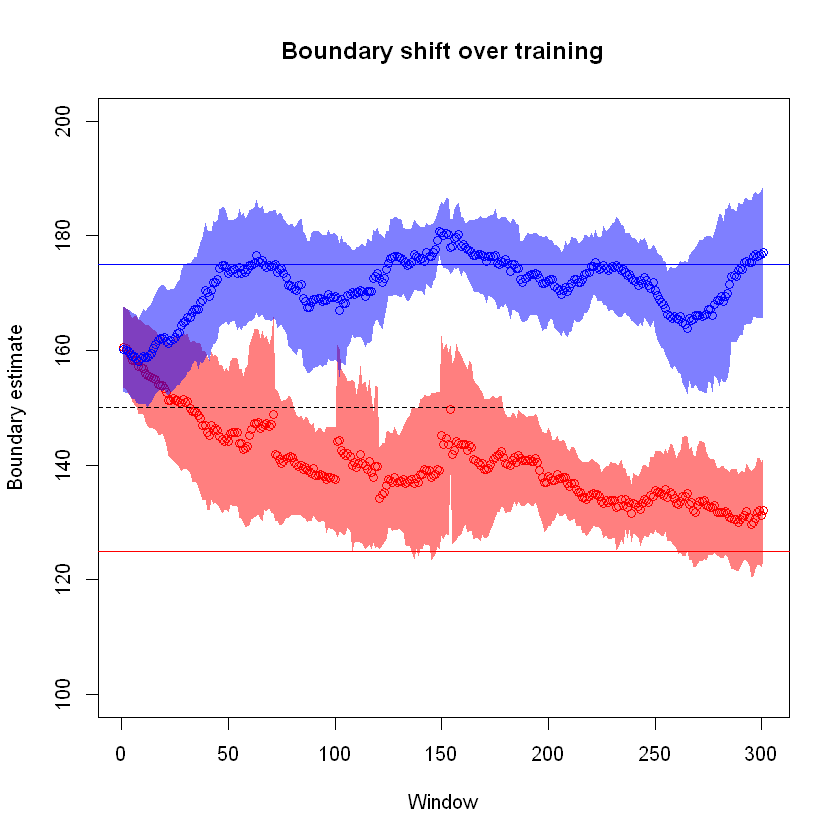

In [218]:
plot.cirib(mvb.noo[mvb.noo$bounds==125,7:307], genplot=T)
plot.cirib(mvb.noo[mvb.noo$bounds==175,7:307], genplot=F, color=4)
abline(h=150, lty=2)
abline(h=175, col=4)
abline(h=125, col=2)
title("Boundary shift over training")